In [25]:
import pandas as pd

# Определяем названия столбцов на основе структуры файла
column_names = [
    'PassengerId',  # Идентификатор пассажира
    'Survived',     # Флаг выживания (0 = нет, 1 = да)
    'Pclass',       # Класс билета (1, 2, 3)
    'Name',         # Полное имя пассажира
    'Sex',          # Пол
    'Age',          # Возраст
    'SibSp',        # Количество родственников (супруг/братья/сестры) на борту
    'Parch',        # Количество родственников (дети/родители) на борту
    'Ticket',       # Номер билета
    'Fare',         # Стоимость билета
    'Cabin',        # Номер каюты
    'Embarked'      # Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)
]

# Загружаем данные из CSV-файла
data = pd.read_csv('data_tms.csv', header=None, names=column_names, skiprows=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
print("\n" + "="*50)
print("АНАЛИЗ ДАТАСЕТА")
print("="*50)

print("\n1. РАЗМЕРНОСТЬ ДАТАСЕТА:")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")

print("\n2. ТИПЫ ДАННЫХ КАЖДОГО СТОЛБЦА:")
print(data.dtypes)

print("\n3. ПЕРВЫЕ 5 СТРОК ДАННЫХ:")
print(data.head())

print("\nПОСЛЕДНИЕ 5 СТРОК ДАННЫХ:")
print(data.tail())


АНАЛИЗ ДАТАСЕТА

1. РАЗМЕРНОСТЬ ДАТАСЕТА:
Количество строк: 891
Количество столбцов: 12

2. ТИПЫ ДАННЫХ КАЖДОГО СТОЛБЦА:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3. ПЕРВЫЕ 5 СТРОК ДАННЫХ:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath

In [27]:
# Проверка пропущенных данных
print("Пропущенные значения в каждом столбце:")
print(data.isnull().sum())

print("\nОбщее количество пропущенных значений:")
print(data.isnull().sum().sum())

print("\nПроцент пропущенных значений в каждом столбце:")
print((data.isnull().sum() / len(data)) * 100)

Пропущенные значения в каждом столбце:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Общее количество пропущенных значений:
866

Процент пропущенных значений в каждом столбце:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [28]:
# Сначала извлечем фамилии из столбца Name
data['Surname'] = data['Name'].str.split(',').str[0]

# Создадим идентификатор семьи на основе фамилии и номера билета
# (предполагаем, что члены одной семьи имеют одинаковую фамилию и номер билета)
data['FamilyId'] = data['Surname'] + '_' + data['Ticket'].astype(str)

# Альтернативный подход: создадим идентификатор семьи на основе фамилии и размера семьи
# Сначала вычислим размер семьи для каждого пассажира
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # +1 для самого пассажира

# Создадим идентификатор семьи
data['FamilyId2'] = data['Surname'] + '_' + data['FamilySize'].astype(str)

# Группировка по семьям (первый метод)
family_groups = data.groupby('FamilyId')

# Посмотрим статистику по семьям
family_stats = family_groups.agg({
    'Survived': ['count', 'mean'],  # количество членов семьи и доля выживших
    'Pclass': 'first',              # класс каюты (предполагаем одинаковый для семьи)
    'Fare': 'sum',                  # общая стоимость билетов семьи
    'SibSp': 'first',               # количество братьев/сестер/супругов
    'Parch': 'first'                # количество родителей/детей
}).round(2)

# Переименуем столбцы для удобства
family_stats.columns = ['FamilySize', 'SurvivalRate', 'Pclass', 'TotalFare', 'SibSp', 'Parch']

# Отсортируем по размеру семьи
family_stats = family_stats.sort_values('FamilySize', ascending=False)

# Посмотрим на самые большие семьи
print("Самые большие семьи:")
print(family_stats.head(10))

# Группировка по фамилиям (второй метод)
surname_groups = data.groupby('Surname')

# Статистика по фамилиям
surname_stats = surname_groups.agg({
    'Survived': ['count', 'mean'],
    'Pclass': 'mean',
    'Fare': 'sum'
}).round(2)

surname_stats.columns = ['FamilySize', 'SurvivalRate', 'AvgPclass', 'TotalFare']
surname_stats = surname_stats.sort_values('FamilySize', ascending=False)

print("\nСтатистика по фамилиям:")
print(surname_stats.head(10))

# Дополнительно: создадим признак "одинокий пассажир"
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# Анализ выживаемости в зависимости от размера семьи
family_size_survival = data.groupby('FamilySize')['Survived'].mean().reset_index()
print("\nЗависимость выживаемости от размера семьи:")
print(family_size_survival)

Самые большие семьи:
                  FamilySize  SurvivalRate  Pclass  TotalFare  SibSp  Parch
FamilyId                                                                   
Sage_CA. 2343              7           0.0       3     486.85      8      2
Andersson_347082           7           0.0       3     218.92      1      5
Panula_3101295             6           0.0       3     238.12      4      1
Goodwin_CA 2144            6           0.0       3     281.40      5      2
Skoog_347088               6           0.0       3     167.40      3      2
Rice_382652                5           0.0       3     145.62      4      1
Lefebre_4133               4           0.0       3     101.87      3      1
Fortune_19950              4           0.5       1    1052.00      3      2
Palsson_349909             4           0.0       3      84.30      3      1
Carter_113760              4           1.0       1     480.00      1      2

Статистика по фамилиям:
           FamilySize  SurvivalRate  AvgPc

Выживаемость мужчин в зависимости от семейного статуса:
                  TotalMen  SurvivalRate  SurvivalPercentage
InFamily                                                    
Одинокие мужчины       411         0.156                15.6
Мужчины в семьях       166         0.271                27.1


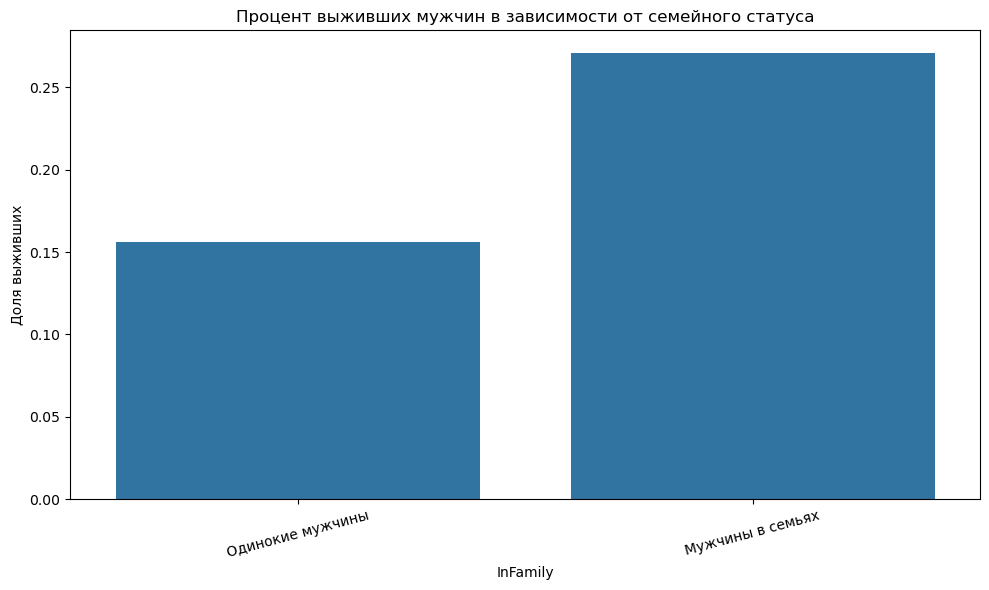


Общее количество мужчин: 577
Мужчин в семьях: 166 (28.8%)
Одиноких мужчин: 411 (71.2%)

Выживаемость мужчин в зависимости от размера семьи:
            Total  SurvivalRate  percentage
FamilySize                                 
1             411         0.156        15.6
2              74         0.243        24.3
3              53         0.396        39.6
4              10         0.500        50.0
5               3         0.000         0.0
6              14         0.000         0.0
7               4         0.250        25.0
8               4         0.000         0.0
11              4         0.000         0.0


In [49]:
# Фильтруем только мужчин и создаем копию для безопасного изменения
men_data = data[data['Sex'] == 'male'].copy()

# Создаем признак "находится в семье" (обратный к "одинокий")
men_data['InFamily'] = (men_data['IsAlone'] == 0).astype(int)

# Группируем по семейному статусу и анализируем выживаемость
family_survival = men_data.groupby('InFamily').agg({
    'Survived': ['count', 'mean']  # количество и доля выживших
}).round(3)

# Переименуем столбцы для удобства
family_survival.columns = ['TotalMen', 'SurvivalRate']

# Добавим процент выживших
family_survival['SurvivalPercentage'] = (family_survival['SurvivalRate'] * 100).round(1)

# Переименуем индексы для лучшей читаемости
family_survival.index = family_survival.index.map({0: 'Одинокие мужчины', 1: 'Мужчины в семьях'})

print("Выживаемость мужчин в зависимости от семейного статуса:")
print(family_survival)

# Визуализация результатов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival.index, y='SurvivalRate', data=family_survival.reset_index())
plt.title('Процент выживших мужчин в зависимости от семейного статуса')
plt.ylabel('Доля выживших')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Дополнительная статистика
total_men = len(men_data)
men_in_families = len(men_data[men_data['InFamily'] == 1])
single_men = len(men_data[men_data['InFamily'] == 0])

print(f"\nОбщее количество мужчин: {total_men}")
print(f"Мужчин в семьях: {men_in_families} ({men_in_families/total_men*100:.1f}%)")
print(f"Одиноких мужчин: {single_men} ({single_men/total_men*100:.1f}%)")

# Анализ выживаемости в зависимости от размера семьи для мужчин
men_family_size_survival = men_data.groupby('FamilySize')['Survived'].agg(['count', 'mean']).round(3)
men_family_size_survival['percentage'] = (men_family_size_survival['mean'] * 100).round(1)
men_family_size_survival = men_family_size_survival.rename(columns={'count': 'Total', 'mean': 'SurvivalRate'})

print("\nВыживаемость мужчин в зависимости от размера семьи:")
print(men_family_size_survival)

Зависимость выживаемости от семейного статуса (все пассажиры):
          TotalPassengers  SurvivalPercentage
IsAlone                                      
В семье               354                50.6
Одинокий              537                30.4

Зависимость выживаемости от пола и семейного статуса:
                Total  SurvivalRate  SurvivalPercentage
Sex    IsAlone                                         
female 0          188         0.713                71.3
       1          126         0.786                78.6
male   0          166         0.271                27.1
       1          411         0.156                15.6


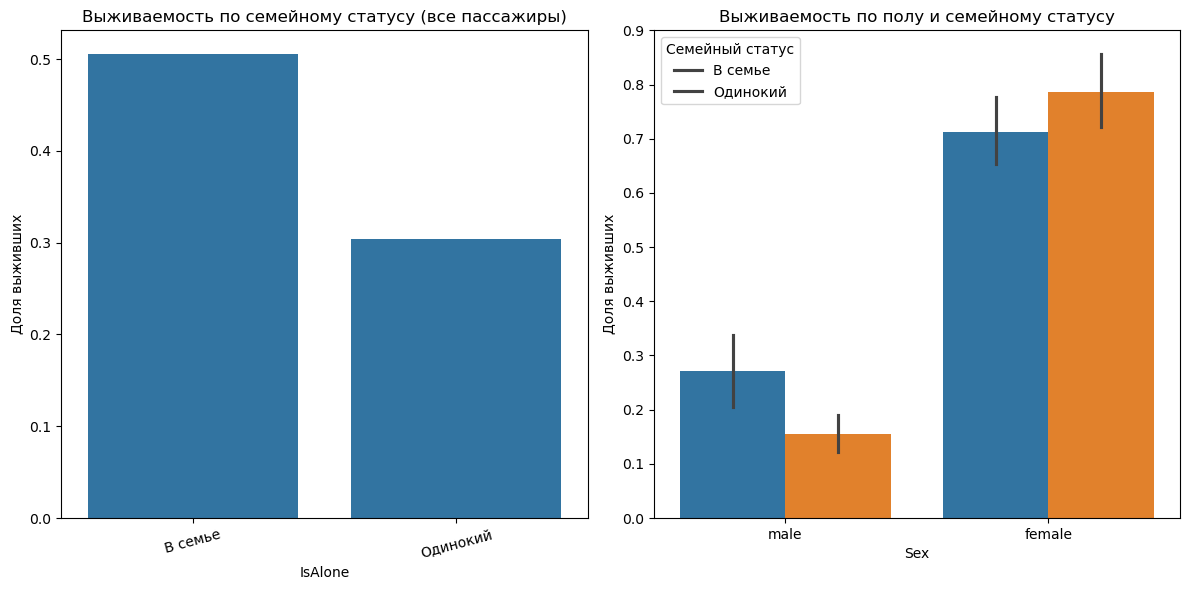


Детальный анализ выживаемости мужчин:
                  TotalMen  SurvivalRate  SurvivalPercentage
IsAlone                                                     
Мужчины в семьях       166         0.271                27.1
Одинокие мужчины       411         0.156                15.6

Детальный анализ выживаемости женщин:
                  TotalWomen  SurvivalRate  SurvivalPercentage
IsAlone                                                       
Женщины в семьях         188         0.713                71.3
Одинокие женщины         126         0.786                78.6


In [30]:
# Создаем признак "одинокий пассажир" (если FamilySize = 1)
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# Анализ выживаемости в зависимости от семейного статуса для всех пассажиров
survival_by_family_status = data.groupby('IsAlone').agg({
    'Survived': ['count', 'mean'],
    'PassengerId': 'count'
}).round(3)

# Переименуем столбцы
survival_by_family_status.columns = ['TotalPassengers', 'SurvivalRate', 'Count']
survival_by_family_status['SurvivalPercentage'] = (survival_by_family_status['SurvivalRate'] * 100).round(1)

# Переименуем индексы
survival_by_family_status.index = survival_by_family_status.index.map({0: 'В семье', 1: 'Одинокий'})

print("Зависимость выживаемости от семейного статуса (все пассажиры):")
print(survival_by_family_status[['TotalPassengers', 'SurvivalPercentage']])

# Анализ по полу
survival_by_sex_and_family = data.groupby(['Sex', 'IsAlone']).agg({
    'Survived': ['count', 'mean']
}).round(3)

# Упростим структуру DataFrame
survival_by_sex_and_family.columns = ['Total', 'SurvivalRate']
survival_by_sex_and_family['SurvivalPercentage'] = (survival_by_sex_and_family['SurvivalRate'] * 100).round(1)

print("\nЗависимость выживаемости от пола и семейного статуса:")
print(survival_by_sex_and_family)

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# График для всех пассажиров
plt.subplot(1, 2, 1)
sns.barplot(x=survival_by_family_status.index, y='SurvivalRate', data=survival_by_family_status.reset_index())
plt.title('Выживаемость по семейному статусу (все пассажиры)')
plt.ylabel('Доля выживших')
plt.xticks(rotation=15)

# График с разбивкой по полу
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=data)
plt.title('Выживаемость по полу и семейному статусу')
plt.ylabel('Доля выживших')
plt.legend(title='Семейный статус', labels=['В семье', 'Одинокий'])

plt.tight_layout()
plt.show()

# Детальный анализ для мужчин (как в предыдущем запросе)
men_data = data[data['Sex'] == 'male']
men_family_survival = men_data.groupby('IsAlone').agg({
    'Survived': ['count', 'mean']
}).round(3)

men_family_survival.columns = ['TotalMen', 'SurvivalRate']
men_family_survival['SurvivalPercentage'] = (men_family_survival['SurvivalRate'] * 100).round(1)
men_family_survival.index = men_family_survival.index.map({0: 'Мужчины в семьях', 1: 'Одинокие мужчины'})

print("\nДетальный анализ выживаемости мужчин:")
print(men_family_survival)

# Детальный анализ для женщин
women_data = data[data['Sex'] == 'female']
women_family_survival = women_data.groupby('IsAlone').agg({
    'Survived': ['count', 'mean']
}).round(3)

women_family_survival.columns = ['TotalWomen', 'SurvivalRate']
women_family_survival['SurvivalPercentage'] = (women_family_survival['SurvivalRate'] * 100).round(1)
women_family_survival.index = women_family_survival.index.map({0: 'Женщины в семьях', 1: 'Одинокие женщины'})

print("\nДетальный анализ выживаемости женщин:")
print(women_family_survival)

Выживаемость женщин в зависимости от наличия детей:
             TotalWomen  SurvivalRate  SurvivalPercentage
HasChildren                                              
Без детей           194         0.789                78.9
С детьми            120         0.667                66.7

Выживаемость женщин по классу каюты и наличию детей:
                    Total  SurvivalRate  SurvivalPercentage
Pclass HasChildren                                         
1      0               64         0.984                98.4
       1               30         0.933                93.3
2      0               45         0.889                88.9
       1               31         0.968                96.8
3      0               85         0.588                58.8
       1               59         0.373                37.3


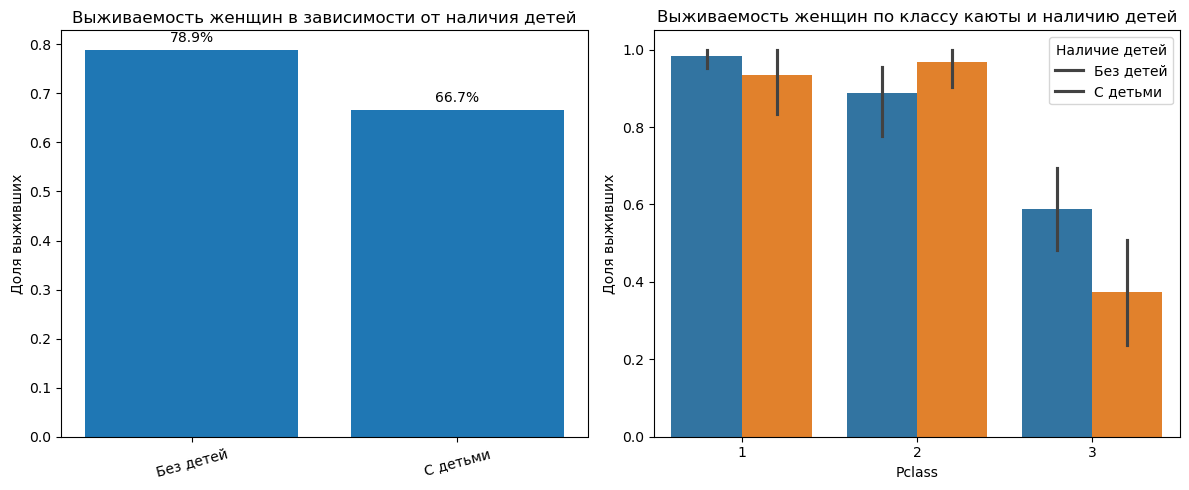


Общее количество женщин: 314
Женщин с детьми: 120 (38.2%)
Женщин без детей: 194 (61.8%)

Средний возраст женщин в группах:
             mean  count
HasChildren             
Без детей    30.8    153
С детьми     23.9    108


In [9]:
# Создаем DataFrame для анализа женщин
data = data[data['Sex'] == 'female'].copy()

# Создаем признак "имеет детей" (Parch > 0)
data['HasChildren'] = (data['Parch'] > 0).astype(int)

# Анализ выживаемости женщин в зависимости от наличия детей
women_survival_by_children = data.groupby('HasChildren').agg({
    'Survived': ['count', 'mean']
}).round(3)

# Упрощаем структуру DataFrame
women_survival_by_children.columns = ['TotalWomen', 'SurvivalRate']
women_survival_by_children['SurvivalPercentage'] = (women_survival_by_children['SurvivalRate'] * 100).round(1)

# Переименуем индексы для лучшей читаемости
women_survival_by_children.index = women_survival_by_children.index.map({0: 'Без детей', 1: 'С детьми'})

print("Выживаемость женщин в зависимости от наличия детей:")
print(women_survival_by_children)

# Более детальный анализ с учетом класса каюты
women_survival_by_class_and_children = data.groupby(['Pclass', 'HasChildren']).agg({
    'Survived': ['count', 'mean']
}).round(3)

# Упрощаем структуру
women_survival_by_class_and_children.columns = ['Total', 'SurvivalRate']
women_survival_by_class_and_children['SurvivalPercentage'] = (women_survival_by_class_and_children['SurvivalRate'] * 100).round(1)

print("\nВыживаемость женщин по классу каюты и наличию детей:")
print(women_survival_by_class_and_children)

# Визуализация результатов
plt.figure(figsize=(12, 5))

# График 1: Общая выживаемость
plt.subplot(1, 2, 1)
bars = plt.bar(women_survival_by_children.index, women_survival_by_children['SurvivalRate'])
plt.title('Выживаемость женщин в зависимости от наличия детей')
plt.ylabel('Доля выживших')
plt.xticks(rotation=15)

# Добавляем значения на столбцы
for bar, percentage in zip(bars, women_survival_by_children['SurvivalPercentage']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{percentage}%', ha='center', va='bottom')

# График 2: Выживаемость по классам кают
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Survived', hue='HasChildren', data=data)
plt.title('Выживаемость женщин по классу каюты и наличию детей')
plt.ylabel('Доля выживших')
plt.legend(title='Наличие детей', labels=['Без детей', 'С детьми'])

plt.tight_layout()
plt.show()

# Дополнительная статистика
total_women = len(data)
women_with_children = len(data[data['HasChildren'] == 1])
women_without_children = len(data[data['HasChildren'] == 0])

print(f"\nОбщее количество женщин: {total_women}")
print(f"Женщин с детьми: {women_with_children} ({women_with_children/total_women*100:.1f}%)")
print(f"Женщин без детей: {women_without_children} ({women_without_children/total_women*100:.1f}%)")

# Анализ среднего возраста женщин в каждой группе
age_stats = data.groupby('HasChildren')['Age'].agg(['mean', 'count']).round(1)
age_stats.index = age_stats.index.map({0: 'Без детей', 1: 'С детьми'})
print("\nСредний возраст женщин в группах:")
print(age_stats)

In [31]:
# Сначала посчитаем реальные статистики из данных
def calculate_actual_statistics(data):
    """Рассчитывает реальные вероятности выживания из данных"""
    
    # Общая статистика по полу
    sex_stats = data.groupby('Sex')['Survived'].mean()
    print("Общая выживаемость по полу:")
    print(sex_stats)
    print()
    
    # Выживаемость по классу и полу
    class_sex_stats = data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
    print("Выживаемость по классу и полу:")
    print(class_sex_stats)
    print()
    
    # Выживаемость по наличию семьи (SibSp + Parch > 0)
    data['HasFamily'] = ((data['SibSp'] + data['Parch']) > 0).astype(int)
    family_stats = data.groupby(['Sex', 'HasFamily'])['Survived'].mean().unstack()
    print("Выживаемость по наличию семьи:")
    print(family_stats)
    print()
    
    # Выживаемость по наличию детей (Parch > 0)
    data['HasChildren'] = (data['Parch'] > 0).astype(int)
    children_stats = data.groupby(['Sex', 'HasChildren'])['Survived'].mean().unstack()
    print("Выживаемость по наличию детей:")
    print(children_stats)
    
    return sex_stats, class_sex_stats, family_stats, children_stats

# Рассчитываем реальные статистики
sex_stats, class_sex_stats, family_stats, children_stats = calculate_actual_statistics(data)

# Улучшенная функция на основе реальных данных
def predict_survival_probability_improved(pclass, sex, is_alone, has_children):
    """
    Улучшенная функция предсказания на основе реальных статистик Титаника
    """
    # Проверяем, какие ключи действительно существуют в данных
    sex_key = 'male' if sex == 'male' else 'female'
    
    # Базовые вероятности из реальных данных
    if sex == 'female':
        base_prob = sex_stats['female']
        
        # Корректировка по классу
        if pclass == 1:
            base_prob = class_sex_stats.loc[1, 'female']
        elif pclass == 2:
            base_prob = class_sex_stats.loc[2, 'female']
        elif pclass == 3:
            base_prob = class_sex_stats.loc[3, 'female']
        
        # Корректировка по наличию детей
        if has_children:
            base_prob = children_stats.loc['female', 1]
        else:
            base_prob = children_stats.loc['female', 0]
            
    else:  # male
        base_prob = sex_stats['male']
        
        # Корректировка по классу
        if pclass == 1:
            base_prob = class_sex_stats.loc[1, 'male']
        elif pclass == 2:
            base_prob = class_sex_stats.loc[2, 'male']
        elif pclass == 3:
            base_prob = class_sex_stats.loc[3, 'male']
        
        # Корректировка по наличию семьи
        if not is_alone:
            base_prob = family_stats.loc['male', 1]
        else:
            base_prob = family_stats.loc['male', 0]
    
    return round(base_prob, 3)

# Тестируем функцию на различных сценариях
test_cases = [
    (1, 'female', False, True, "Женщина 1 класс с детьми"),
    (1, 'female', True, False, "Женщина 1 класс без детей"),
    (3, 'female', False, True, "Женщина 3 класс с детьми"),
    (1, 'male', False, True, "Мужчина 1 класс с семьей"),
    (1, 'male', True, False, "Мужчина 1 класс один"),
    (3, 'male', False, False, "Мужчина 3 класс с семьей"),
    (3, 'male', True, False, "Мужчина 3 класс один")
]

print("\nТестирование улучшенной функции:")
print("=" * 50)
for pclass, sex, is_alone, has_children, description in test_cases:
    prob = predict_survival_probability_improved(pclass, sex, is_alone, has_children)
    print(f"{description}: {prob:.1%}")


Общая выживаемость по полу:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Выживаемость по классу и полу:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

Выживаемость по наличию семьи:
HasFamily         0         1
Sex                          
female     0.785714  0.712766
male       0.155718  0.271084

Выживаемость по наличию детей:
HasChildren         0         1
Sex                            
female       0.788660  0.666667
male         0.165289  0.311828

Тестирование улучшенной функции:
Женщина 1 класс с детьми: 66.7%
Женщина 1 класс без детей: 78.9%
Женщина 3 класс с детьми: 66.7%
Мужчина 1 класс с семьей: 27.1%
Мужчина 1 класс один: 15.6%
Мужчина 3 класс с семьей: 27.1%
Мужчина 3 класс один: 15.6%


In [60]:
def predict_survival_probability_simple(pclass, sex, is_alone, has_children):
    """
    Простая функция предсказания
    """
    # Базовые вероятности выживания на основе исторических данных
    if sex == 'female':
        # Женщины имели высокий шанс выживания
        base_prob = 0.921053
        
        # Корректировки для женщин
        if has_children:
            # Женщины с детьми имели приоритет при посадке в шлюпки
            base_prob -= 0.075368
        if pclass == 1:
            base_prob += 0.047032
        elif pclass == 3:
            base_prob -= 0.421053
            
    else:
        # Мужчины имели низкий шанс выживания
        base_prob = 0.157407
        
        # Корректировки для мужчин
        if not is_alone:
            # Мужчины в семьях имели немного более высокие шансы
            base_prob += 0.154421
        if pclass == 1:
            base_prob += 0.211445
        elif pclass == 3:
            base_prob -= 0.02196
    
    # Ограничение вероятности диапазоном [0, 1]
    return max(0, min(1, base_prob))

# Пример 
prob = predict_survival_probability_simple(1, 'female', True, True)
print(f"Вероятность выживания: {prob:.2%}")

prob = predict_survival_probability_simple(2, 'male', True, True)
print(f"Вероятность выживания: {prob:.2%}")

Вероятность выживания: 89.27%
Вероятность выживания: 15.74%
